In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data= pd.read_csv('D:\Datascience\shampoo\shampoo.csv')

In [33]:
data.shape

(37, 2)

In [34]:
data.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [35]:
data=data.rename(columns={'Sales of shampoo over a three year period': 'Sales'}) # renaming the sales column

In [36]:
data=data.dropna(axis=0)

In [37]:
data['Date']=pd.to_datetime('190'+data.Month,format='%Y-%m')

In [38]:
data=data.drop('Month', axis=1)

In [39]:
data.set_index('Date', inplace=True)

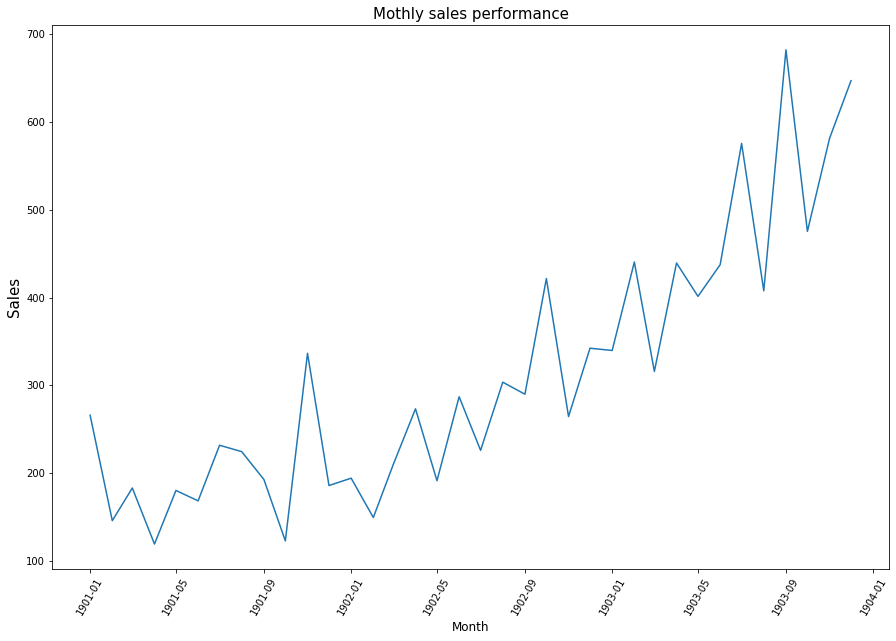

In [40]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.title('Mothly sales performance', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=60)
plt.show()


We see that the series is not stationary\
lets check the stationarity of the series.

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
def test_stationary(data):
    #getting the rolling mean and the rolling std of the series
    roll_mean=data.rolling(5).mean()
    roll_std=data.rolling(5).std()   

    #plotting 
    plt.figure(figsize=(13,10))
    plt.plot(data, color='blue', label='Original_Series')
    plt.plot(roll_mean, color='red', label='Rolling mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.title('Original Series Vs. Rolling Mean and Rolling std')
    plt.xlabel('month')
    plt.ylabel('Sales Value')
    plt.xticks(rotation=60)
    plt.legend()
    plt.show()
    
    #Dickey fuller Test
    print("Dickey Fuller Test:")
    dftest = adfuller(data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('Critical values')
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    
   

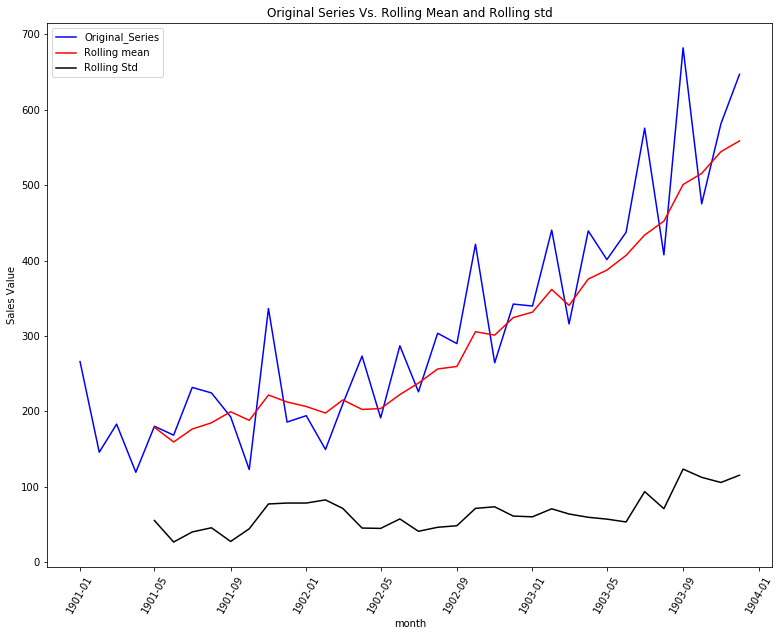

Dickey Fuller Test:
Critical values
Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [43]:
test_stationary(data['Sales'])

We see the time series is not stationarey the rolling mean is increasing also the standard deviation. The test statistic 3.06, way higher than the critical value.

Log- Transform to make the series stationary

In [44]:
data_log=np.log(data)

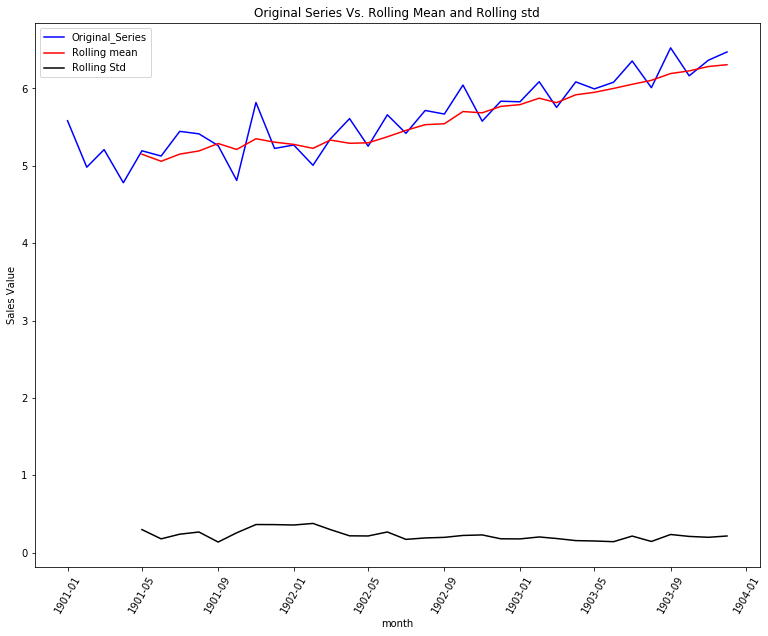

Dickey Fuller Test:
Critical values
Test Statistic                  1.798463
p-value                         0.998346
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [45]:
test_stationary(data_log['Sales'])

Moving Average

In [46]:
data_ma=data_log.rolling(7).mean()

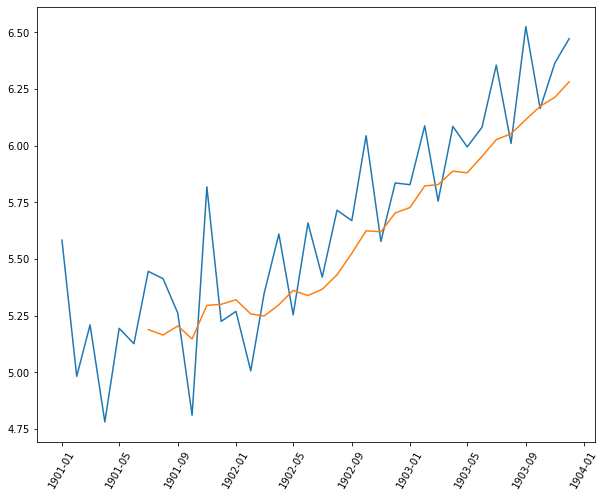

In [47]:
plt.figure(figsize=(10,8))
plt.plot(data_log)
plt.plot(data_ma)
plt.xticks(rotation=60)
plt.show()

In [48]:
datalog_diff=data_log-data_ma
datalog_diff.head()

,Sales
Date,
1901-01-01,NaN
1901-02-01,NaN
1901-03-01,NaN
1901-04-01,NaN
1901-05-01,NaN


In [49]:
datalog_diff=datalog_diff.dropna()

In [50]:
datalog_diff.isnull().sum()

Sales    0
dtype: int64

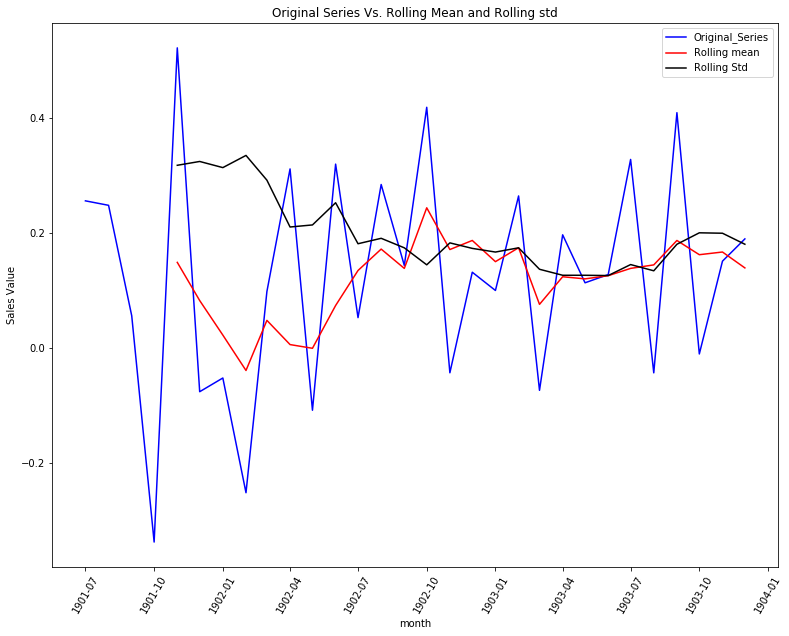

Dickey Fuller Test:
Critical values
Test Statistic                -7.909715e+00
p-value                        3.978079e-12
#Lags Used                     0.000000e+00
Number of Observations Used    2.900000e+01
Critical Value (1%)           -3.679060e+00
Critical Value (5%)           -2.967882e+00
Critical Value (10%)          -2.623158e+00
dtype: float64


In [51]:
test_stationary(datalog_diff['Sales'])

the Test statistics is less than 1% critical value.\
We can say that the series is stationary with 99% confidence\
Just to see, Lets try checking with exponential weighted moving agverage where the more weightage is given to the recent values

#### Exponenitial weighted moving average

In [52]:
data_ewma=data_log.ewm(halflife=1).mean()

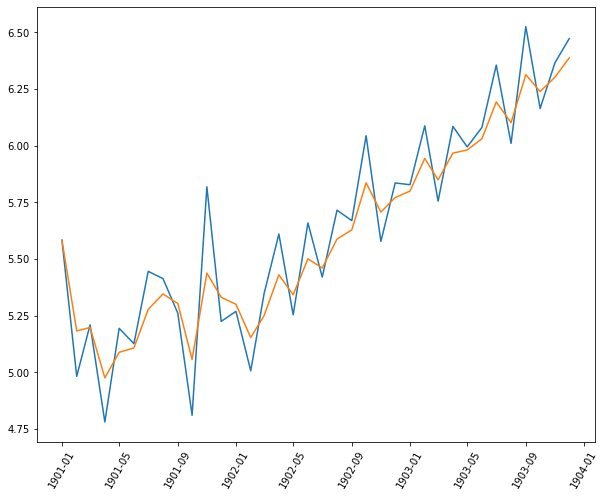

In [53]:
plt.figure(figsize=(10,8))
plt.plot(data_log)
plt.plot(data_ewma)
plt.xticks(rotation=60)
plt.show()

In [54]:
data_diff_ew=data_log-data_ewma

In [55]:
data_diff_ew.isnull().sum()

Sales    0
dtype: int64

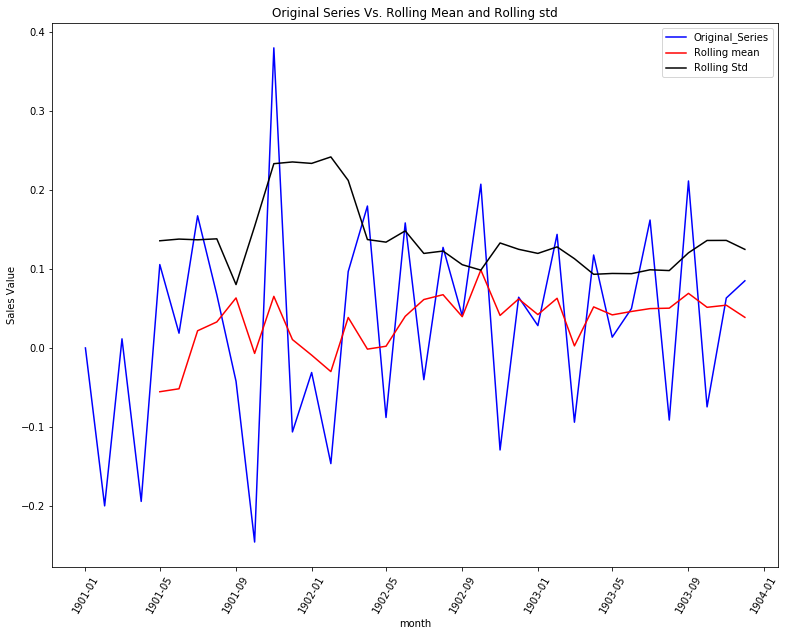

Dickey Fuller Test:
Critical values
Test Statistic                 -2.639697
p-value                         0.085067
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [56]:
test_stationary(data_diff_ew['Sales'])

ACF and PACF

In [57]:
from statsmodels.tsa.stattools import acf, pacf

In [77]:
lag_acf= acf(data_log, nlags=25)
lag_pacf=pacf(data_log, nlags=25, method='ols')

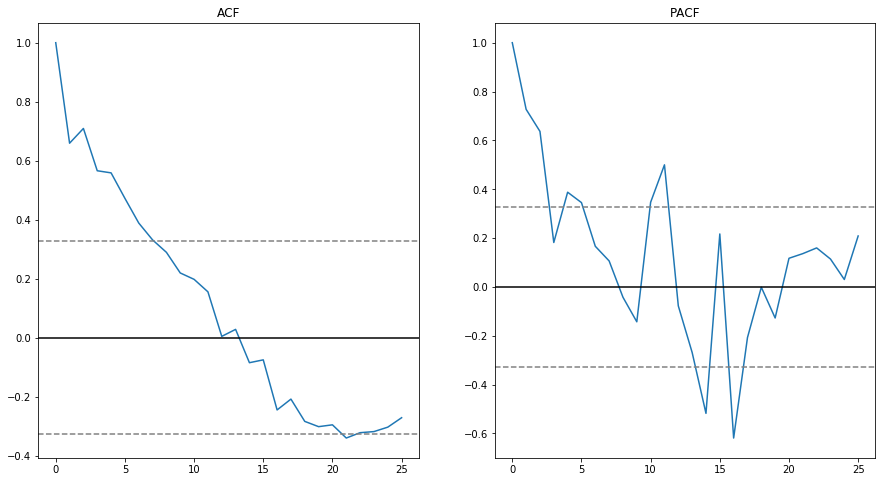

In [78]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(lag_acf)
plt.axhline(y=0, color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log)), linestyle='--', color='gray')
plt.title ('ACF')

plt.subplot(1,2,2)
plt.plot(lag_pacf)
plt.axhline(y=0, color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log)), linestyle='--', color='gray')
plt.title ('PACF')

plt.show()

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=3.\
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=7.

In [60]:
data_log_diff=data_log-data_log.shift()
data_log_diff=data_log_diff.dropna()

the above differencing can be used can be directly done in Arima model

In [79]:
from statsmodels.tsa.arima_model import ARIMA

AR- time series model fiting

In [80]:
model=ARIMA(data_log,order=(3,1,0))

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [81]:
model_fit=model.fit()

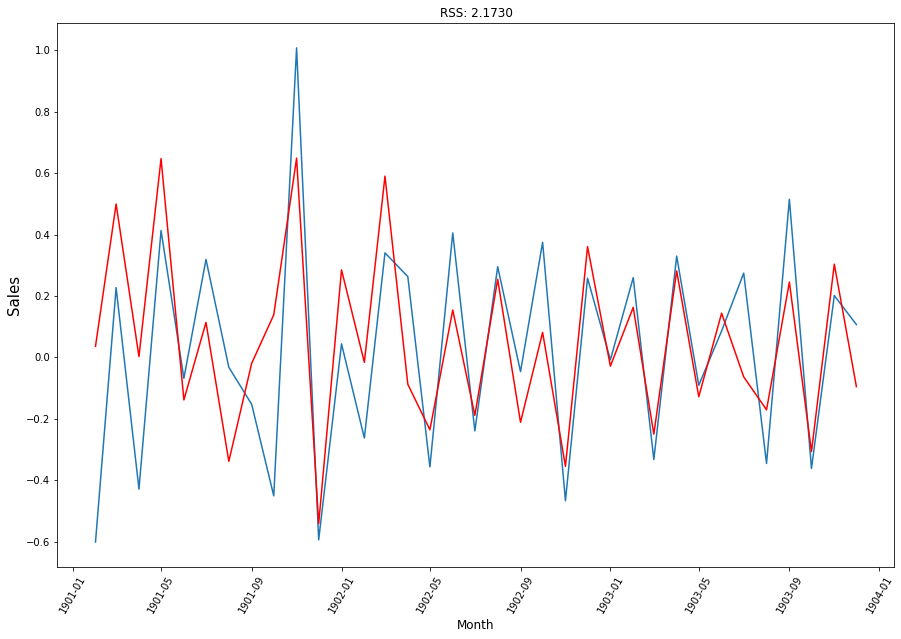

In [82]:
plt.figure(figsize=(15,10))
plt.plot(data_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-data_log_diff['Sales'])**2))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=60)
plt.show()

MA : Model

In [89]:
model=ARIMA(data_log,order=(0,1,2))
model_fit=model.fit()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


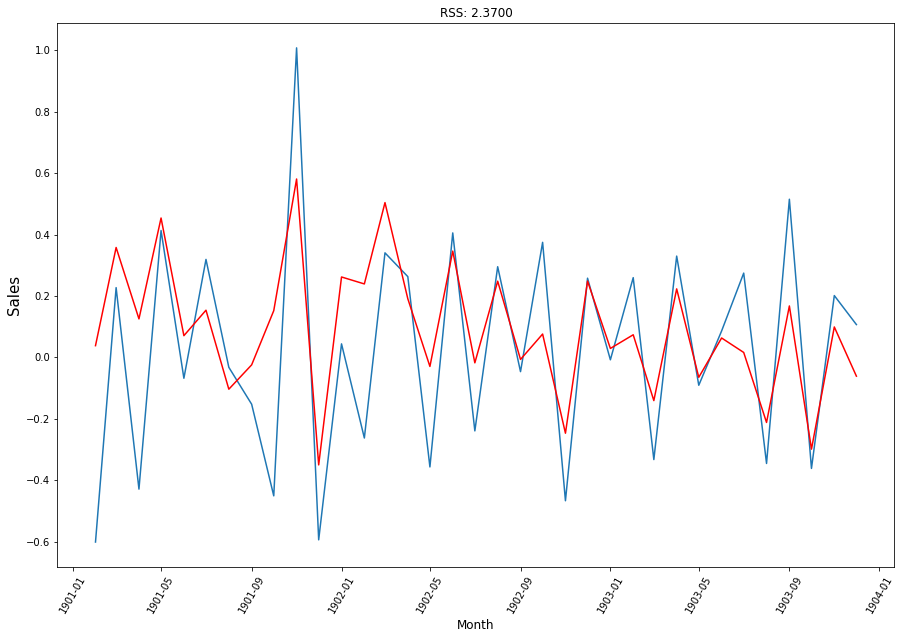

In [66]:
plt.figure(figsize=(15,10))
plt.plot(data_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-data_log_diff['Sales'])**2))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=60)
plt.show()

ARIMA Model:

In [68]:
model=ARIMA(data_log, order=(5,1,1))
model_fit=model.fit(disp=-1)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


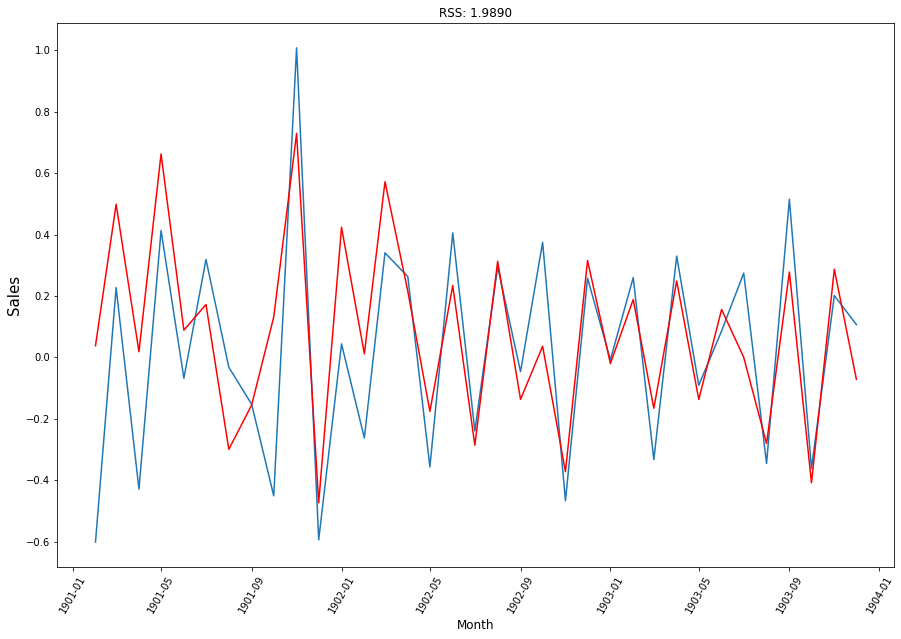

In [69]:
plt.figure(figsize=(15,10))
plt.plot(data_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-data_log_diff['Sales'])**2))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=60)
plt.show()

In [70]:
Prediction_Arima_diff=pd.DataFrame(model_fit.fittedvalues, columns={'Sales'})
Prediction_Arima_diff.head()

,Sales
Date,
1901-02-01,0.038210
1901-03-01,0.498526
1901-04-01,0.018669
1901-05-01,0.662227
1901-06-01,0.088777


In [71]:
data['Prediction']=Prediction_Arima_diff

In [72]:
data['Prediction']=data['Prediction'].fillna(np.log(data['Sales']))

In [73]:
data['Prediction']=np.exp(data['Prediction'])

In [74]:
data['Prediction']=data['Prediction'].cumsum()

In [75]:
data.tail()

,Sales,Prediction
Date,,
1903-08-01,407.6,301.217219
1903-09-01,682.0,302.537582
1903-10-01,475.3,303.202677
1903-11-01,581.3,304.535260
1903-12-01,646.9,305.466452


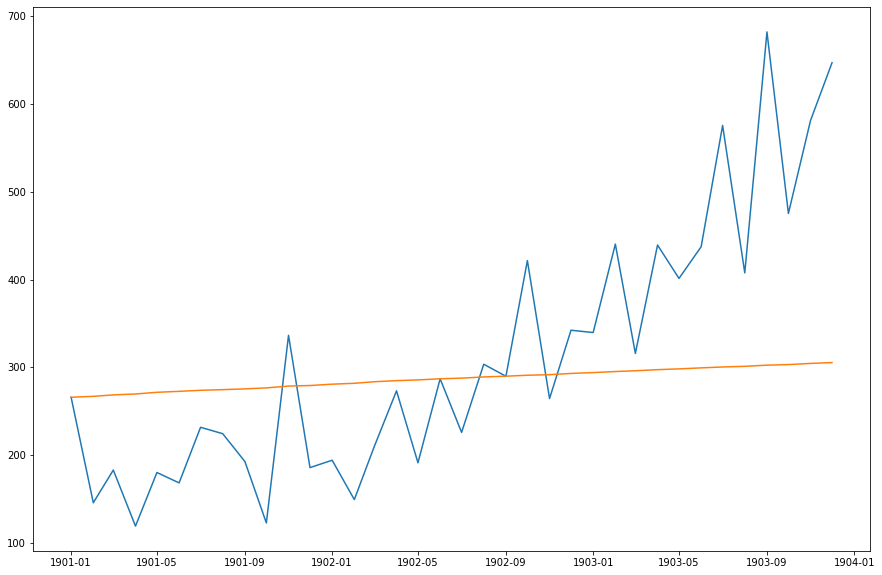

In [76]:
plt.figure(figsize=(15,10))
plt.plot(data['Sales'])
plt.plot(data['Prediction'])
#plt.title('RMSE: {}'.format(jnp.sqrt(metrics.mean_squared_error(data_ma, Prediction_Arima))))

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


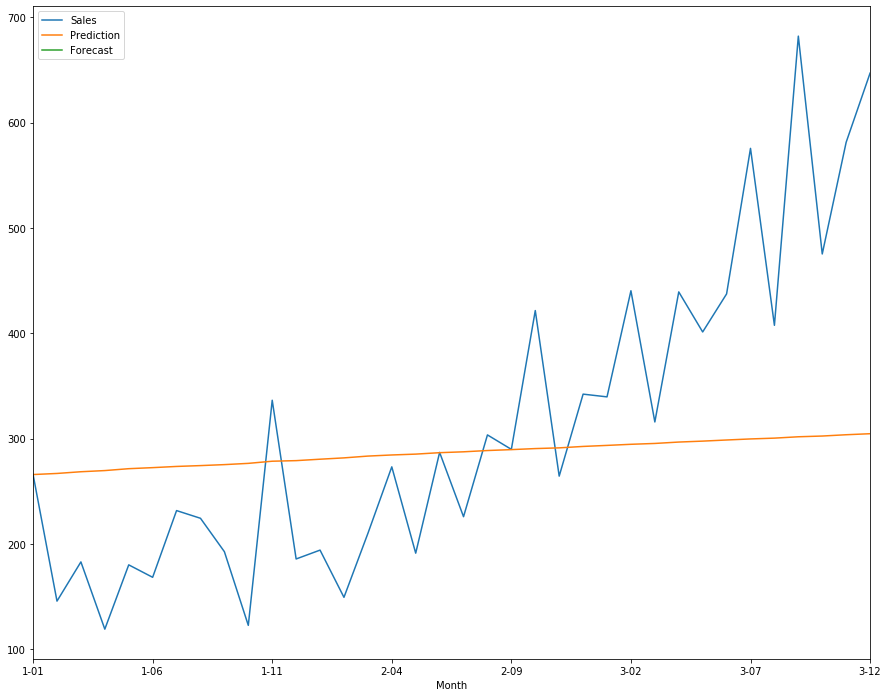

In [105]:
data['Forecast']=model_fit.predict(start=32, end=38, dynamic=True)
data[['Sales','Prediction', 'Forecast']].plot(figsize=(15,12))
plt.show()